In [10]:
from transformers import AutoTokenizer, T5ForConditionalGeneration
import pandas as pd
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report

In [2]:
ckpt = 'Narrativa/byt5-base-tweet-hate-detection'

tokenizer = AutoTokenizer.from_pretrained(ckpt)
model = T5ForConditionalGeneration.from_pretrained(ckpt).to("cpu")

In [3]:
def classify_tweet(tweet):
    inputs = tokenizer([tweet], padding='max_length', truncation=True, max_length=512, return_tensors='pt')
    input_ids = inputs.input_ids.to('cpu')
    attention_mask = inputs.attention_mask.to('cpu')
    output = model.generate(input_ids, attention_mask=attention_mask)
    return tokenizer.decode(output[0], skip_special_tokens=True)

In [4]:
df = pd.read_csv('processed_reddit.csv')

In [5]:
df.head()

,text,hate_speech
0,A subsection of retarded Hungarians? Ohh boy. ...,True
1,Hiii. Just got off work. 444 is mainly the typ...,False
2,wow i guess soyboys are the same in every country,False
3,Owen 's soyboy song goes for every country and...,False
4,"> ""y'all hear sumn?"" by all means I live in a...",False


In [9]:
y_pred = [classify_tweet(txt) for txt in df[:50]['text']]


In [18]:
label_map = {False: 'no-hate-speech', True: 'hate-speech'}
y_true = [label_map[v] for v in df[:50]['hate_speech'].values]

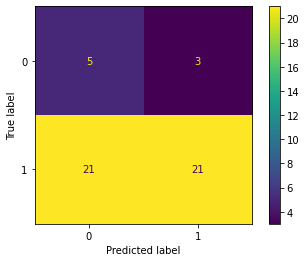

In [19]:
cm = confusion_matrix(y_true, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

In [21]:
print(classification_report(y_true, y_pred))

                precision    recall  f1-score   support

   hate-speech       0.19      0.62      0.29         8
no-hate-speech       0.88      0.50      0.64        42

      accuracy                           0.52        50
     macro avg       0.53      0.56      0.47        50
  weighted avg       0.77      0.52      0.58        50

